In [45]:

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix as sm
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score


In this project, we will take use some self-defined functions to plot the 2-D K-Means.

# Import Data
In this project, we use [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine) to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it ):
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 

Variable `Label` include the true labels of different wine.

From the table above we can get that there are 178 instances of wine and 13 attributes and for each attribute, the distribution differ a lot. Then we are going to plot the scatter plot of the dataset `wine` as follow:

In [46]:
wine = pd.read_csv('C:/Users/mkuod/OneDrive/Documents/Griffith University/Second year/First semster/Data Analytics/Lab 2/wine.data(1).csv')

### Keep 1st column into a separate variable (label) and remove it from DataFrame.

In [48]:
Label = wine['Label']
Label

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Label, Length: 178, dtype: int64

In [49]:
# Slice From 2rd to end
wine = wine.iloc[:,1:]

In [50]:
wine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Use Scatter plot to learn attributes of data. What is your conclusion?

 ##### Alcohol vs Magnesium

In [ ]:
# positive correlation between alcohol and magnesium.Increase in alcohol results in an increase in magnesium

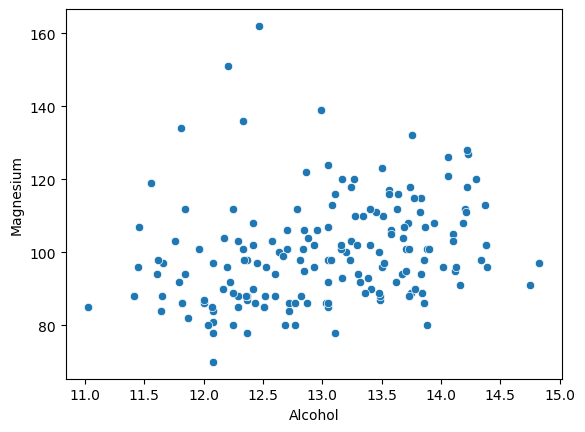

In [51]:
ax = sns.scatterplot(x= "Alcohol", y = "Magnesium" , data=wine)

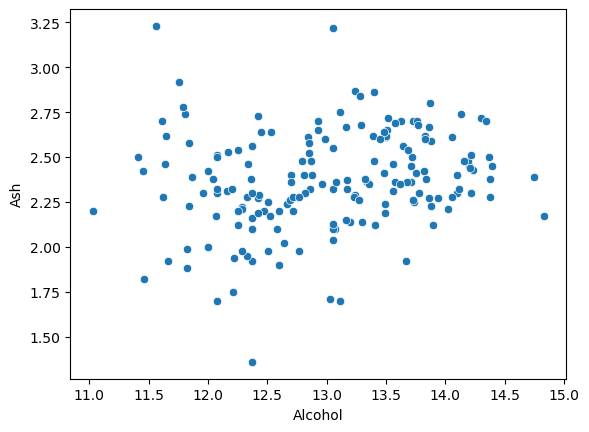

In [53]:
ax = sns.scatterplot(x= "Alcohol", y = "Ash" , data=wine)

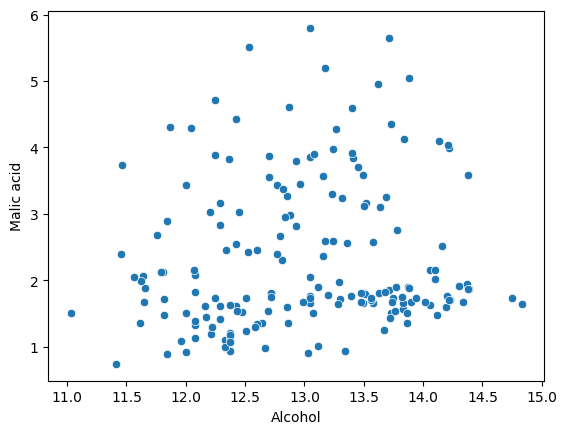

In [55]:
ax = sns.scatterplot(x= "Alcohol", y = "Malic acid" , data=wine)

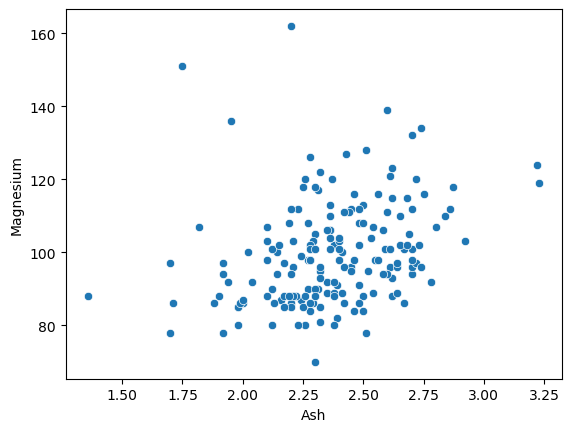

In [56]:
ax = sns.scatterplot(x= "Ash", y = "Magnesium" , data=wine)

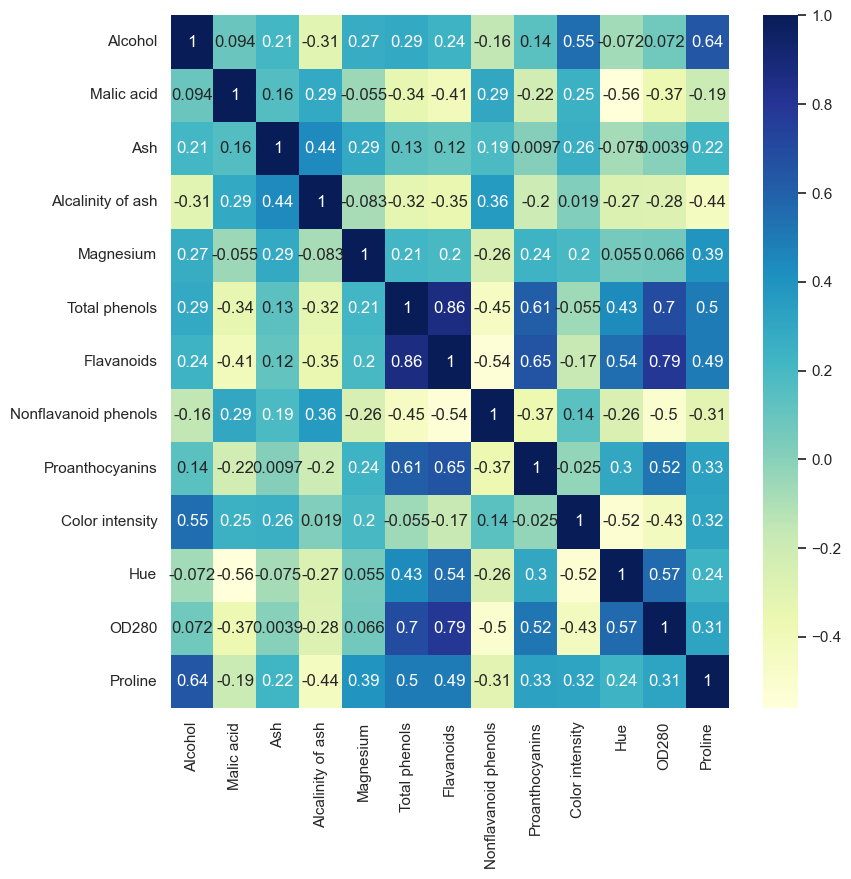

In [65]:

# Correlation Heatmap
plt.subplots(figsize = (9,9))
dataplot = sns.heatmap(wine.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the heatmap above, we can conclude that the correlation between

* "Flavanoids" and "Total phenols" (`0.86`);
* "OD280" and "Flavanoids" (`0.79`);
* "OD280" and "Total phenols" (`0.7`);

are large.

Then we can plot the regression of "Flavanoids" on "Total phenols" as follow:

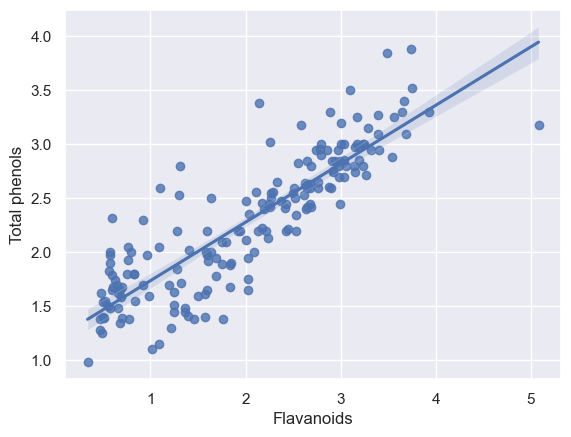

In [66]:
# create a regression plot
sns.regplot(x="Flavanoids", y="Total phenols", data=wine)
# show the plot
plt.show()

In [ ]:
there is a postive correlationship here

# [K-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)


## K-Means

In [74]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(wine)

label_pred_KM = res.astype('float64')
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)


Labels predicted by K-Means: [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 0. 2. 2. 0. 2. 2. 0. 0. 0. 2.
 2. 1. 0. 2. 2. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0.
 0. 2. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 2. 2.
 0. 0. 2. 0. 0. 2. 2. 2. 2. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 2. 0. 0.
 0. 0. 2. 2. 0. 0. 0. 0. 0. 2.]
Length of labels is same as data entry (178,)


We can plot the pairwise relationships of `winenorm` with the colored label predicted bt K-Means method.

In [75]:
centroids_KM = kMeansClustering.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

Shape of centroids_KM (3, 13)
Centroids: [[1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]


In [76]:
inertia_KM = kMeansClustering.inertia_
print("Inertia:",inertia_KM)

Inertia: 2370689.686782968


Normalize data by removing the mean and scaling to unit variance using
`preprocessing.StandardScaler` and do kMeans again.

In [77]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(wine)
X_scaled_array = standardScaler.transform(wine)
normalizedData = pd.DataFrame(X_scaled_array, columns = wine.columns)

In [79]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(wine)

label_pred_KM = res.astype('float64')
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)


Labels predicted by K-Means: [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 0. 2. 2. 0. 2. 2. 0. 0. 0. 2.
 2. 1. 0. 2. 2. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0.
 0. 2. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 2. 2.
 0. 0. 2. 0. 0. 2. 2. 2. 2. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 2. 0. 0.
 0. 0. 2. 2. 0. 0. 0. 0. 0. 2.]
Length of labels is same as data entry (178,)


In [80]:
centroids_KM = kMeansClustering.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

Shape of centroids_KM (3, 13)
Centroids: [[1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]


In [81]:
inertia_KM = kMeansClustering.inertia_
print("Inertia:",inertia_KM)

Inertia: 2370689.686782968
